In [14]:
from ase.calculators.vasp import VaspChargeDensity
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import sys
import numpy as np
from skimage import io, color
# import PIL.Image
from PIL import Image
from ase.calculators.vasp import VaspChargeDensity
import pylab
import pandas as pd
import time
import cv2
import matplotlib.cm as cm


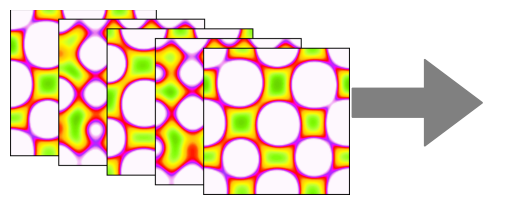

In [55]:
# Changeable parameters
layers = 5  # How many images should be stacked.
x_offset, y_offset = 100, 20  # Number of pixels to offset each image.



# Filepath to numpy array
directory='1-NiCuAuPdPt_color1/3-Ni3-Cu3-Au3-Pd3-Pt4/'


# border widths; I set them all to 150
top, bottom, left, right = [2]*4


# Load in the images
x = np.load(f'{directory}0001.npz')
img1 =  x['a']


color = [0,0,0,255] # black



# Make shape for new plot
new_shape = (img1.shape[0]+2*left,
             img1.shape[1]+2*top,
             4)  # the last number, i.e. 4, refers to the 4 different channels, being RGB + alpha
img1_bord = np.zeros(new_shape, dtype=int)
img1_bord[::,::,...] = color
# plt.imshow(img1_bord,cmap=style)
# plt.show()
img1_bord[left:img1.shape[0]+left,
          top:img1.shape[1]+top,
          ...] = img1
img1 = img1_bord.copy()
# plt.imshow(img1_bord,cmap=style)
# plt.show()

# plt.imshow(img_with_border,cmap=style)
x = np.load(f'{directory}0014.npz')
img2 = x['a']

img1_bord = np.zeros(new_shape, dtype=int)
img1_bord[::,::,...] = color
img1_bord[left:img2.shape[0]+left,
          top:img2.shape[1]+top,
          ...] = img2
img2 = img1_bord.copy()

x = np.load(f'{directory}0028.npz')
img3 = x['a']
img1_bord = np.zeros(new_shape, dtype=int)
img1_bord[::,::,...] = color
img1_bord[left:img3.shape[0]+left,
          top:img3.shape[1]+top,
          ...] = img3
img3 = img1_bord.copy()

x = np.load(f'{directory}0042.npz')
img4 = x['a']
img1_bord = np.zeros(new_shape, dtype=int)
img1_bord[::,::,...] = color
img1_bord[left:img4.shape[0]+left,
          top:img4.shape[1]+top,
          ...] = img4
img4 = img1_bord.copy()

x = np.load(f'{directory}0056.npz')
img5 = x['a']
img1_bord = np.zeros(new_shape, dtype=int)
img1_bord[::,::,...] = color
img1_bord[left:img5.shape[0]+left,
          top:img5.shape[1]+top,
          ...] = img5
img5 = img1_bord.copy()

# Create new colorscales
rainbow = mpl.colormaps['gist_ncar'].resampled(128)
new_style = rainbow(np.linspace(0,1,128))
new_style = new_style[48:,:]
style = ListedColormap(new_style)

# cv2.imshow(img_with_border)
# plt.imshow(cv2.cvtColor(img_with_border, cv2.COLOR_BGR2RGB),cmap=style)
# plt.axis('off')
# plt.show()

# Make shape for new plot
new_shape = ((layers - 1)*y_offset + img1.shape[0],
             (layers - 1)*x_offset + img1.shape[1],
             4)  # the last number, i.e. 4, refers to the 4 different channels, being RGB + alpha

# Stack the images
stacked = np.zeros(new_shape, dtype=int)


stacked[0*y_offset:0*y_offset + img1.shape[0],
        0*x_offset:0*x_offset + img1.shape[1], 
        ...] = img1 #*1./layers

stacked[1*y_offset:1*y_offset + img1.shape[0],
        1*x_offset:1*x_offset + img1.shape[1], 
        ...] = img2 #*1./layers

stacked[2*y_offset:2*y_offset + img1.shape[0],
        2*x_offset:2*x_offset + img1.shape[1], 
        ...] = img3 #*1./layers

stacked[3*y_offset:3*y_offset + img1.shape[0],
        3*x_offset:3*x_offset + img1.shape[1], 
        ...] = img4 #*1./layers

stacked[4*y_offset:4*y_offset + img1.shape[0],
        4*x_offset:4*x_offset + img1.shape[1], 
        ...] = img5 #*1./layers

# Plot the stacked images
# stacked2 = Image.fromarray(stacked).convert('L')
# plt.imshow(stacked2)
# plt.show()
plt.imshow(stacked,cmap='gray')#,cmap=style)
# imgplot.set_cmap('viridis')
# plt.text(75,150,'...',ha='center',va='center',fontsize=16)
ymin,ymax = plt.ylim()
# print(ymin,ymax)
plt.annotate("", xy=(710,(ymax-ymin)/2), arrowprops=dict(arrowstyle="->"))
plt.arrow(710,(-ymax+ymin)/2, 150, 0,width=60,head_length=120,color='gray')
plt.axis('off')
plt.savefig('3D-slices.jpeg',bbox_inches='tight',transparent=True)
plt.show()
# top

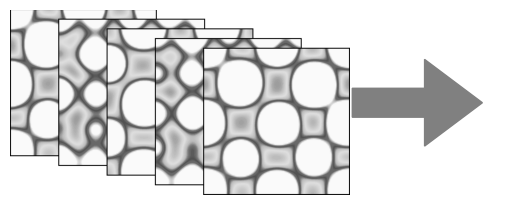

In [56]:
# Changeable parameters
layers = 5  # How many images should be stacked.
x_offset, y_offset = 100, 20  # Number of pixels to offset each image.



# Filepath to numpy array
directory='1-NiCuAuPdPt_color1/3-Ni3-Cu3-Au3-Pd3-Pt4/'


# border widths; I set them all to 150
top, bottom, left, right = [2]*4


# Load in the images
x = np.load(f'{directory}0001.npz')
img1 =  x['a']


# img2 = Image.fromarray(img1).convert('L')

# Extract the RGB channels
rgb = img1[:, :, :3]

# Extract the alpha channel
alpha = img1[:, :, 3]

# Convert RGB to grayscale using the luminosity method
gray = np.dot(rgb, [0.299, 0.587, 0.114]).astype(np.uint8)

# Stack the grayscale image with the original alpha channel to create a new RGBA image
img1 = np.stack((gray, gray, gray, alpha), axis=-1) 


color = [0,0,0,255] # black



# Make shape for new plot
new_shape = (img1.shape[0]+2*left,
             img1.shape[1]+2*top,
             4)  # the last number, i.e. 4, refers to the 4 different channels, being RGB + alpha
img1_bord = np.zeros(new_shape, dtype=int)
img1_bord[::,::,...] = color
# plt.imshow(img1_bord,cmap=style)
# plt.show()
img1_bord[left:img1.shape[0]+left,
          top:img1.shape[1]+top,
          ...] = img1
img1 = img1_bord.copy()
# plt.imshow(img1_bord,cmap=style)
# plt.show()

# plt.imshow(img_with_border,cmap=style)
x = np.load(f'{directory}0014.npz')
img2 = x['a']
# Extract the RGB channels
rgb = img2[:, :, :3]

# Extract the alpha channel
alpha = img2[:, :, 3]

# Convert RGB to grayscale using the luminosity method
gray = np.dot(rgb, [0.299, 0.587, 0.114]).astype(np.uint8)

# Stack the grayscale image with the original alpha channel to create a new RGBA image
img2 = np.stack((gray, gray, gray, alpha), axis=-1) 

img1_bord = np.zeros(new_shape, dtype=int)
img1_bord[::,::,...] = color
img1_bord[left:img2.shape[0]+left,
          top:img2.shape[1]+top,
          ...] = img2
img2 = img1_bord.copy()

x = np.load(f'{directory}0028.npz')
img3 = x['a']
# Extract the RGB channels
rgb = img3[:, :, :3]

# Extract the alpha channel
alpha = img3[:, :, 3]

# Convert RGB to grayscale using the luminosity method
gray = np.dot(rgb, [0.299, 0.587, 0.114]).astype(np.uint8)

# Stack the grayscale image with the original alpha channel to create a new RGBA image
img3 = np.stack((gray, gray, gray, alpha), axis=-1) 

img1_bord = np.zeros(new_shape, dtype=int)
img1_bord[::,::,...] = color
img1_bord[left:img3.shape[0]+left,
          top:img3.shape[1]+top,
          ...] = img3
img3 = img1_bord.copy()

x = np.load(f'{directory}0042.npz')
img4 = x['a']
# Extract the RGB channels
rgb = img4[:, :, :3]

# Extract the alpha channel
alpha = img4[:, :, 3]

# Convert RGB to grayscale using the luminosity method
gray = np.dot(rgb, [0.299, 0.587, 0.114]).astype(np.uint8)

# Stack the grayscale image with the original alpha channel to create a new RGBA image
img4 = np.stack((gray, gray, gray, alpha), axis=-1) 


img1_bord = np.zeros(new_shape, dtype=int)
img1_bord[::,::,...] = color
img1_bord[left:img4.shape[0]+left,
          top:img4.shape[1]+top,
          ...] = img4
img4 = img1_bord.copy()

x = np.load(f'{directory}0056.npz')
img5 = x['a']
# Extract the RGB channels
rgb = img5[:, :, :3]

# Extract the alpha channel
alpha = img5[:, :, 3]

# Convert RGB to grayscale using the luminosity method
gray = np.dot(rgb, [0.299, 0.587, 0.114]).astype(np.uint8)

# Stack the grayscale image with the original alpha channel to create a new RGBA image
img5 = np.stack((gray, gray, gray, alpha), axis=-1) 

img1_bord = np.zeros(new_shape, dtype=int)
img1_bord[::,::,...] = color
img1_bord[left:img5.shape[0]+left,
          top:img5.shape[1]+top,
          ...] = img5
img5 = img1_bord.copy()

# Create new colorscales
rainbow = mpl.colormaps['gist_ncar'].resampled(128)
new_style = rainbow(np.linspace(0,1,128))
new_style = new_style[48:,:]
style = ListedColormap(new_style)

# cv2.imshow(img_with_border)
# plt.imshow(cv2.cvtColor(img_with_border, cv2.COLOR_BGR2RGB),cmap=style)
# plt.axis('off')
# plt.show()

# Make shape for new plot
new_shape = ((layers - 1)*y_offset + img1.shape[0],
             (layers - 1)*x_offset + img1.shape[1],
             4)  # the last number, i.e. 4, refers to the 4 different channels, being RGB + alpha

# Stack the images
stacked = np.zeros(new_shape, dtype=int)


stacked[0*y_offset:0*y_offset + img1.shape[0],
        0*x_offset:0*x_offset + img1.shape[1], 
        ...] = img1 #*1./layers

stacked[1*y_offset:1*y_offset + img1.shape[0],
        1*x_offset:1*x_offset + img1.shape[1], 
        ...] = img2 #*1./layers

stacked[2*y_offset:2*y_offset + img1.shape[0],
        2*x_offset:2*x_offset + img1.shape[1], 
        ...] = img3 #*1./layers

stacked[3*y_offset:3*y_offset + img1.shape[0],
        3*x_offset:3*x_offset + img1.shape[1], 
        ...] = img4 #*1./layers

stacked[4*y_offset:4*y_offset + img1.shape[0],
        4*x_offset:4*x_offset + img1.shape[1], 
        ...] = img5 #*1./layers

# Plot the stacked images
# stacked2 = Image.fromarray(stacked).convert('L')
# plt.imshow(stacked2)
# plt.show()
plt.imshow(stacked,cmap='gray')#,cmap=style)
# imgplot.set_cmap('viridis')
# plt.text(75,150,'...',ha='center',va='center',fontsize=16)
ymin,ymax = plt.ylim()
# print(ymin,ymax)
plt.annotate("", xy=(710,(ymax-ymin)/2), arrowprops=dict(arrowstyle="->"))
plt.arrow(710,(-ymax+ymin)/2, 150, 0,width=60,head_length=120,color='gray')
plt.axis('off')
plt.savefig('3D-slices_gray.jpeg',bbox_inches='tight',transparent=True)
plt.show()
# top

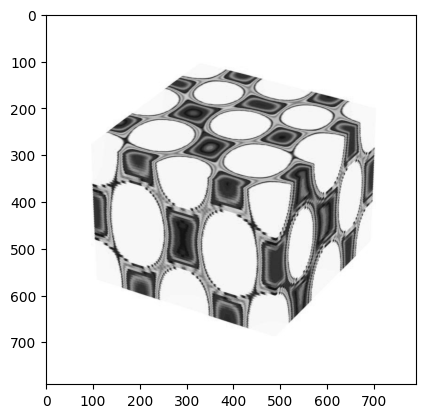

In [66]:
# Load an image using Pillow
image = Image.open('3D-quinary.jpeg')

# Convert the image to grayscale
image_gray = image.convert('L')

# Convert the grayscale image to a NumPy array
image_gray_array = np.array(image_gray)

# Plot the grayscale image with a specific colormap
plt.imshow(image_gray,cmap='gray')  # Change 'plasma' to any other colormap you prefer
# plt.colorbar()  # Optional: to add a colorbar
plt.show()

(300, 300, 56)


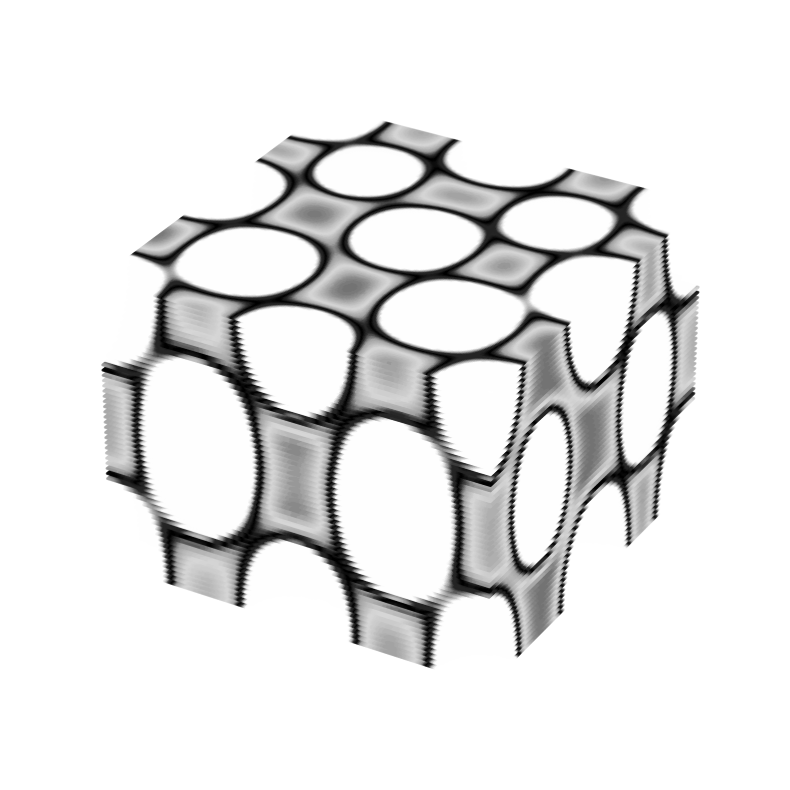

In [67]:

values=[]
# directory='2-NiAu_color1/66-Ni8-Au8/'
directory='1-NiCuAuPdPt_color1/3-Ni3-Cu3-Au3-Pd3-Pt4/'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        # values.append(np.load(f)['a'])
        img = np.asarray(Image.fromarray(np.load(f)['a']).convert('L'))
#         plt.imshow(img,cmap='gray')
#         plt.scatter(x=img[0],y=img[1],cmap='gray')
#         print(img.shape)
        values.append(img)
        
# values = np.stack(values,axis=-1)
values = np.dstack(values)
print(values.shape)
# Plot slices along the fourth dimension (time)
# num_slices = values.shape[3]
# fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))  # Create subplots for each slice

# for i in range(num_slices):
#     axes[i].imshow(values[:, :, :, i].mean(axis=2), cmap='viridis')  # Plot the mean along the depth axis
#     axes[i].set_title(f'Slice {i}')
#     axes[i].axis('off')
rainbow = mpl.colormaps['gist_ncar'].resampled(128)
new_style = rainbow(np.linspace(0,1,128))
new_style = new_style[48:,:]
style = ListedColormap(new_style) 

array_3d=values.copy()
# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D array
x, y, z = np.meshgrid(np.arange(array_3d.shape[1]),
                      np.arange(array_3d.shape[0]),
                      np.arange(array_3d.shape[2]))

# Flatten the arrays
x = x.flatten()
y = y.flatten()
z = z.flatten()
colors = array_3d.flatten()

# # Plot the points
ax.scatter(x, y, z, c=colors, cmap='gray', s=1)
# ax.scatter(x, y, z, c=colors,alpha=0.5)
# ax.set_cmap(style)
# # Set labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

ax.axis('off')
plt.savefig('3D-quinary_gray.jpeg',bbox_inches='tight',transparent=True)
plt.show()



(300, 300, 56)


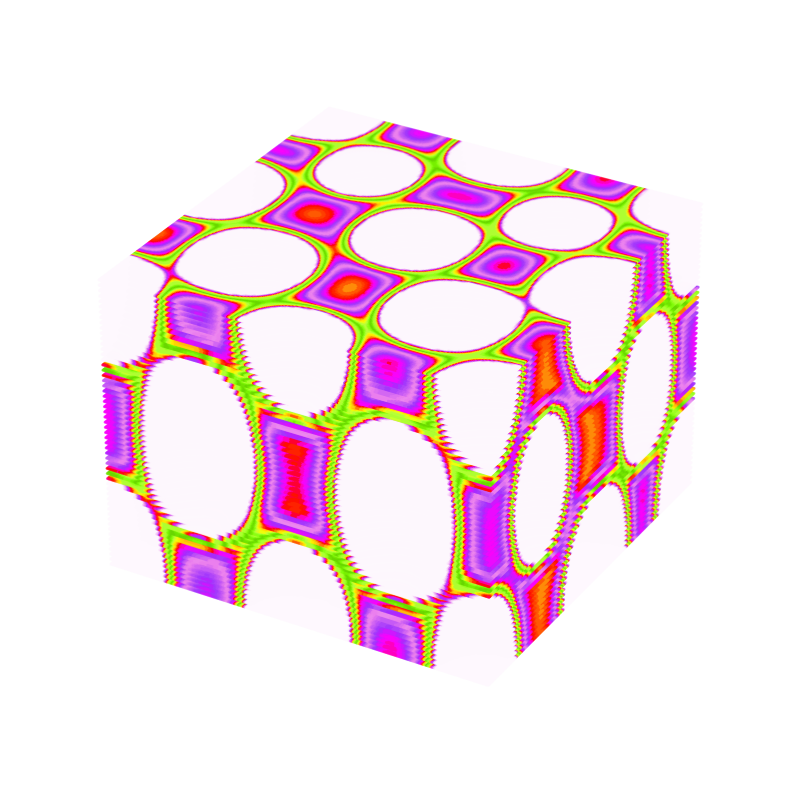

In [69]:

values=[]
# directory='2-NiAu_color1/66-Ni8-Au8/'
directory='1-NiCuAuPdPt_color1/3-Ni3-Cu3-Au3-Pd3-Pt4/'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        # values.append(np.load(f)['a'])
        img = np.asarray(Image.fromarray(np.load(f)['a']).convert('L'))
        
        values.append(img)
        
# values = np.stack(values,axis=-1)
values = np.dstack(values)
print(values.shape)
# Plot slices along the fourth dimension (time)
# num_slices = values.shape[3]
# fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))  # Create subplots for each slice

# for i in range(num_slices):
#     axes[i].imshow(values[:, :, :, i].mean(axis=2), cmap='viridis')  # Plot the mean along the depth axis
#     axes[i].set_title(f'Slice {i}')
#     axes[i].axis('off')
rainbow = mpl.colormaps['gist_ncar'].resampled(128)
new_style = rainbow(np.linspace(0,1,128))
new_style = new_style[48:,:]
style = ListedColormap(new_style) 

array_3d=values.copy()
# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D array
x, y, z = np.meshgrid(np.arange(array_3d.shape[1]),
                      np.arange(array_3d.shape[0]),
                      np.arange(array_3d.shape[2]))

# Flatten the arrays
x = x.flatten()
y = y.flatten()
z = z.flatten()
colors = array_3d.flatten()

# # Plot the points
ax.scatter(x, y, z, c=colors,cmap=style, s=1)
# ax.scatter(x, y, z, c=colors,alpha=0.5)
# ax.set_cmap(style)
# # Set labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

ax.axis('off')
plt.savefig('3D-quinary.jpeg',bbox_inches='tight',transparent=True)
plt.show()


(300, 300, 56)
[[0.4100986  0.83857188 0.         1.        ]
 [0.42569223 0.86422593 0.         1.        ]
 [0.44128587 0.88987998 0.         1.        ]
 [0.45687951 0.91553404 0.         1.        ]
 [0.47247315 0.94118809 0.         1.        ]
 [0.48806679 0.96684214 0.00646374 1.        ]
 [0.50802237 0.99249619 0.03782589 1.        ]
 [0.54385703 1.         0.06918804 1.        ]
 [0.57969169 1.         0.10055019 1.        ]
 [0.61552635 1.         0.13191234 1.        ]
 [0.65136101 1.         0.1632745  1.        ]
 [0.68719567 1.         0.19463665 1.        ]
 [0.72303033 1.         0.2259988  1.        ]
 [0.75886499 1.         0.21103905 1.        ]
 [0.79469965 1.         0.1796769  1.        ]
 [0.83053431 1.         0.14831475 1.        ]
 [0.86636897 1.         0.1169526  1.        ]
 [0.90220363 1.         0.08559045 1.        ]
 [0.93803829 1.         0.0542283  1.        ]
 [0.97387295 0.98530317 0.02286614 1.        ]
 [1.         0.96588346 0.         1.        

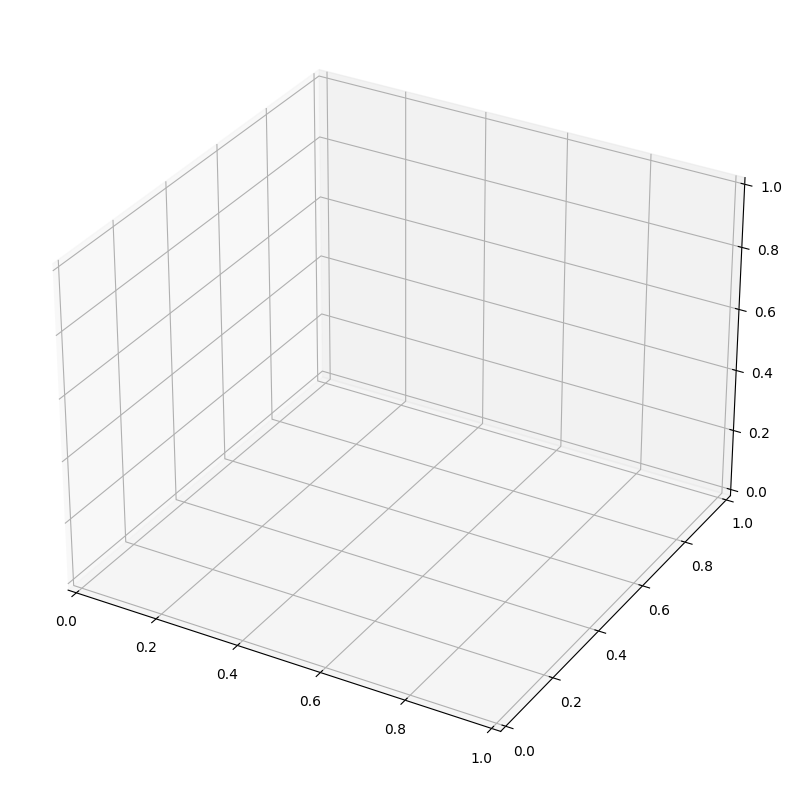

In [24]:

# Initialize an empty list to store the values
values = []

# Define the directory containing the image files
directory = '1-NiCuAuPdPt_color1/3-Ni3-Cu3-Au3-Pd3-Pt4/'

# Loop through the files in the directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        # Load the image, convert to grayscale and add to the list
        img = np.asarray(Image.fromarray(np.load(f)['a']).convert('L'))
        values.append(img)

# Stack the values along the third dimension
values = np.dstack(values)
print(values.shape)

# Create a custom colormap
rainbow = plt.get_cmap('gist_ncar').resampled(128)
new_style = rainbow(np.linspace(0, 1, 128))
new_style = new_style[48:, :]
style = ListedColormap(new_style)

# Normalize the values to [0, 1] for colormap compatibility
norm = plt.Normalize(vmin=values.min(), vmax=values.max())
normalized_values = norm(values)

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Generate meshgrid for the 3D plot
x, y, z = np.meshgrid(np.arange(values.shape[1]),
                      np.arange(values.shape[0]),
                      np.arange(values.shape[2]))

print(style.colors)
# Flatten the arrays
x = x.flatten()
y = y.flatten()
z = z.flatten()
colors = normalized_values.flatten()

# Plot the points with the custom colormap
# sc = ax.scatter(x, y, z, c=colors, cmap=style)

# Add a colorbar to visualize the colormap
# cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
# cbar.set_label('Intensity')

# Set labels (if needed)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# ax.axis('off')

# Show the plot
plt.show()


(300, 300, 56)


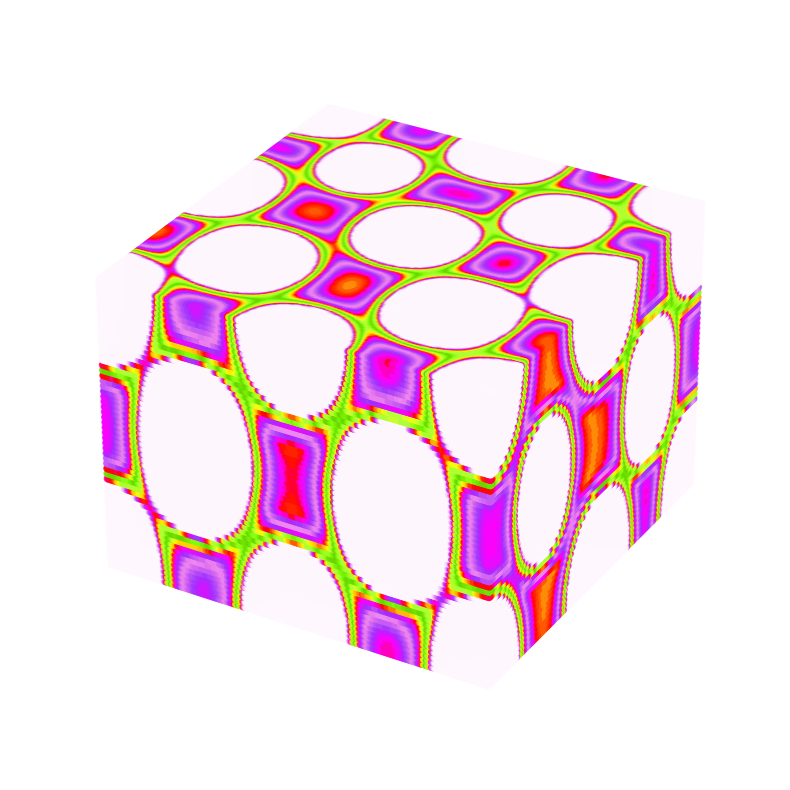

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

# Initialize an empty list to store the values
values = []

# Define the directory containing the image files
directory = '1-NiCuAuPdPt_color1/3-Ni3-Cu3-Au3-Pd3-Pt4/'

# Loop through the files in the directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        # Load the image, convert to grayscale and add to the list
        img = np.asarray(Image.fromarray(np.load(f)['a']).convert('L'))
        values.append(img)

# Stack the values along the third dimension
values = np.dstack(values)
print(values.shape)

# Create a custom colormap
rainbow = plt.get_cmap('gist_ncar').resampled(128)
new_style = rainbow(np.linspace(0, 1, 128))
new_style = new_style[48:, :]
style = ListedColormap(new_style)

# Normalize the grayscale values to the range [0, 1]
min_val, max_val = values.min(), values.max()
norm = Normalize(vmin=min_val, vmax=max_val)
normalized_values = norm(values)

# Map normalized values to colormap colors
mapped_colors = style(normalized_values)

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Generate meshgrid for the 3D plot
x, y, z = np.meshgrid(np.arange(values.shape[1]),
                      np.arange(values.shape[0]),
                      np.arange(values.shape[2]))

# Flatten the arrays
x = x.flatten()
y = y.flatten()
z = z.flatten()
colors = mapped_colors.reshape(-1, 4)  # Reshape to match the scatter plot input

# Plot the points with the custom colormap colors
sc = ax.scatter(x, y, z, c=colors)

# Add a colorbar to visualize the colormap
# We need to create a mappable for the colorbar
mappable = plt.cm.ScalarMappable(cmap=style, norm=norm)
mappable.set_array(values)
# cbar = plt.colorbar(mappable, ax=ax, shrink=0.5, aspect=5)
# cbar.set_label('Intensity')

# Set labels (if needed)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

ax.axis('off')

# Show the plot
plt.show()
